<a href="https://colab.research.google.com/github/Tonyndungu-git/fashion_mnist_tf_project/blob/main/Beyond_Hello_World%2C_A_Computer_Vision_Example.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf

print(tf.__version__)

2.8.0


In [ ]:
# Load the Fashion MNIST dataset
fmnist = tf.keras.datasets.fashion_mnist

In [ ]:
# Load the training and test split of the Fashion MNIST dataset
(training_images, training_labels), (test_images, test_labels) = fmnist.load_data()


4431872/4422102 [==============================] - 0s 0us/step


LABEL: 8

IMAGE PIXEL ARRAY:
 [[  0   0   0   0   0   0   3   0   0   0  48  73  96 110 115 110 115 107  90  72  50  25   0   0   1   1   0   0]
 [  0   0   0   1   0   5   0  15 185 243 244 247 245 245 244 247 246 247 250 251 246 247 227  42   0   1   0   0]
 [  0   0   0   0   4   0   4 220 105  56 114  73  81  99  76  38 136  68  18  82  73  11 129 240   0   0   1   0]
 [  0   0   1   0   1   0 139 190   8 174  79  63  70 119  48 110  30  55 139 147  50 135   0 227 108   0   0   0]
 [  0   0   1   0   0   0 203 213   2 113 173 102 111 182  63   6 143  45  72 255  62   0  81 227 182   0   0   0]
 [  0   0   1   0   0   0 214 190 202  71  64 113 109 157  39 191 255  29 174 198  74  40 113 234 182   0   0   0]
 [  0   0   0   1   0  26 204 174  20  49 177  45   0 172   0 221 227  18  44  80  76 120   0 197 195   0   0   0]
 [  0   0   0   0  15 133 197 217 134 126 219 105 241 239 117 156 155 144 147 168 141 182 255 214 197 138   0   0]
 [  0   0   0   5 178 235 194 206   0  40 122  48 

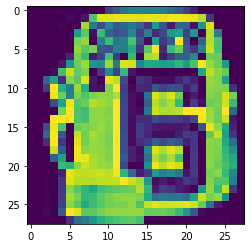

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# You can put between 0 to 59999 here
index = 6000

# Set number of characters per row when printing
np.set_printoptions(linewidth=320)

# Print the label and image
print(f'LABEL: {training_labels[index]}')
print(f'\nIMAGE PIXEL ARRAY:\n {training_images[index]}')

# Visualize the image
plt.imshow(training_images[index])

In [ ]:
# Normalize the pixel values of the train and test images
training_images  = training_images / 255.0
test_images = test_images / 255

In [ ]:
# Build the classification model
model = tf.keras.models.Sequential([tf.keras.layers.Flatten(), 
                                    tf.keras.layers.Dense(128, activation=tf.nn.relu), 
                                    tf.keras.layers.Dense(10, activation=tf.nn.softmax)])

In [ ]:
# Declare sample inputs and convert to a tensor
inputs = np.array([[1.0, 3.0, 4.0, 2.0]])
inputs = tf.convert_to_tensor(inputs)
print(f'input to softmax function: {inputs.numpy()}')

# Feed the inputs to a softmax activation function
outputs = tf.keras.activations.softmax(inputs)
print(f'output of softmax function: {outputs.numpy()}')

# Get the sum of all values after the softmax
sum = tf.reduce_sum(outputs)
print(f'sum of outputs: {sum}')

# Get the index with highest value
prediction = np.argmax(outputs)
print(f'class with highest probability: {prediction}')

input to softmax function: [[1. 3. 4. 2.]]
output of softmax function: [[0.0320586  0.23688282 0.64391426 0.08714432]]
sum of outputs: 1.0
class with highest probability: 2


In [ ]:
#Fitting model
model.compile(optimizer = tf.optimizers.Adam(),
              loss = 'sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(training_images, training_labels, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 12s 6ms/step - loss: 0.4985 - accuracy: 0.8253
Epoch 2/5
1875/1875 [==============================] - 11s 6ms/step - loss: 0.3737 - accuracy: 0.8648
Epoch 3/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3372 - accuracy: 0.8772
Epoch 4/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3132 - accuracy: 0.8853
Epoch 5/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2925 - accuracy: 0.8926
